In [2]:
import pandas as pd

In [3]:
df = pd.read_excel("regression_data.xls")

In [3]:
df.dtypes

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [4]:
df2 = df.drop(columns=["lat", "long", "id", "date"])

In [5]:
df2

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,180000
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509,360000
21593,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200,400000
21594,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007,402101
21595,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287,400000


In [6]:
null_values = df2.isnull().sum()
null_values

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [7]:
df2.duplicated().sum()

6

In [8]:
#pip install scikit-learn


In [9]:
#pip install numpy


In [10]:
#pip install scipy

In [11]:
#pip install matplotlib seaborn


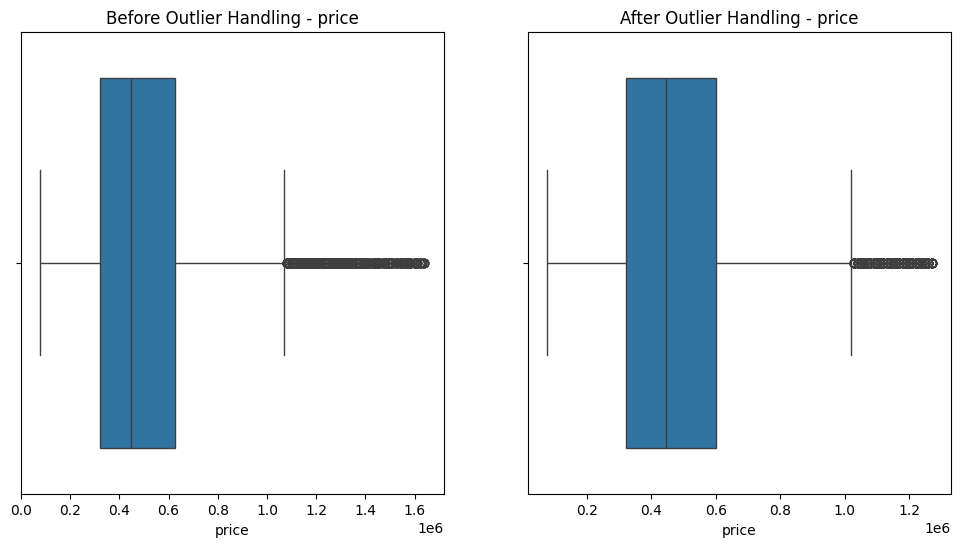

Outliers removed: 435
Total observations before outlier handling: 21597


In [9]:
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 2: Function to detect and handle outliers using z-score
def handle_outliers_zscore(data, column, threshold=3, replacement_method='median'):
    initial_count = len(data)
    
    z_scores = zscore(data[column])
    outliers = np.abs(z_scores) > threshold
    
    # Handle outliers
    if sum(outliers) > 0:
        if replacement_method == 'mean':
            replacement_value = data[~outliers][column].mean()
        elif replacement_method == 'median':
            replacement_value = data[~outliers][column].median()
        elif replacement_method == 'quantile':
            replacement_value = data[~outliers][column].quantile(0.75)  # Replace with desired quantile
        else:
            raise ValueError("Invalid replacement method. Use 'mean', 'median', or 'quantile'.")
        
        data.loc[outliers, column] = replacement_value
    
    outliers_removed = sum(outliers)
    final_count = len(data)
    
    return data, outliers_removed, initial_count

# Step 3: Example of outlier handling for a specific column 
column_name = 'price'
df_before = df2.copy()  # Create a copy for visualization comparison
df2, outliers_removed, initial_count = handle_outliers_zscore(df2, column_name, threshold=3, replacement_method='median')

# Step 4: Visualize the handling of outliers using z-score
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_before, x=column_name)
plt.title(f'Before Outlier Handling - {column_name}')

plt.subplot(1, 2, 2)
sns.boxplot(data=df2, x=column_name)
plt.title(f'After Outlier Handling - {column_name}')

plt.show()

# Step 5: Display counts
print(f"Outliers removed: {outliers_removed}")
print(f"Total observations before outlier handling: {initial_count}")


In [13]:
cleaned_data = handle_outliers_zscore(df2,'price')

In [14]:
cleaned_data.to_csv("cleaned_data.csv", index=False)

In [15]:
cleaned_data.dtypes

bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object